**Importing the files**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dailyActivity_merged.csv to dailyActivity_merged.csv


**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dailyActivity_merged = pd.read_csv("dailyActivity_merged.csv")
dailyActivity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
dailyActivity_merged.shape

(940, 15)

In [ ]:
dailyActivity_merged.isna().sum()

,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance,0
ModeratelyActiveDistance,0
LightActiveDistance,0
SedentaryActiveDistance,0


In [ ]:
dailyActivity_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [ ]:
dailyActivity_merged.duplicated().sum()

0

In [ ]:
dailyActivity_merged.dtypes

,0
Id,int64
ActivityDate,object
TotalSteps,int64
TotalDistance,float64
TrackerDistance,float64
LoggedActivitiesDistance,float64
VeryActiveDistance,float64
ModeratelyActiveDistance,float64
LightActiveDistance,float64
SedentaryActiveDistance,float64


**Data Cleaning**

In [ ]:
# to convert ActivityDate in proper format
dailyActivity_merged['ActivityDate'] = pd.to_datetime(dailyActivity_merged['ActivityDate'])
dailyActivity_merged['ActivityDate'] =pd.to_datetime(dailyActivity_merged['ActivityDate']).dt.strftime('%d/%m/%Y')
dailyActivity_merged['ActivityDate'] = dailyActivity_merged['ActivityDate'].str.replace('/', '-')
dailyActivity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,12-04-2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,13-04-2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,14-04-2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,15-04-2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,16-04-2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
dailyActivity_merged['ActivityDate'] = pd.to_datetime(dailyActivity_merged['ActivityDate'], format='%d-%m-%Y')

In [ ]:
dailyActivity_merged.dtypes

,0
Id,int64
ActivityDate,datetime64[ns]
TotalSteps,int64
TotalDistance,float64
TrackerDistance,float64
LoggedActivitiesDistance,float64
VeryActiveDistance,float64
ModeratelyActiveDistance,float64
LightActiveDistance,float64
SedentaryActiveDistance,float64


**Data Visualization**

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dailyActivity_merged_grouped = dailyActivity_merged.groupby('ActivityDate')['TotalSteps'].sum().reset_index()
fig = px.bar(dailyActivity_merged_grouped, x = 'ActivityDate', y = 'TotalSteps', title = 'Total Steps Per Day')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


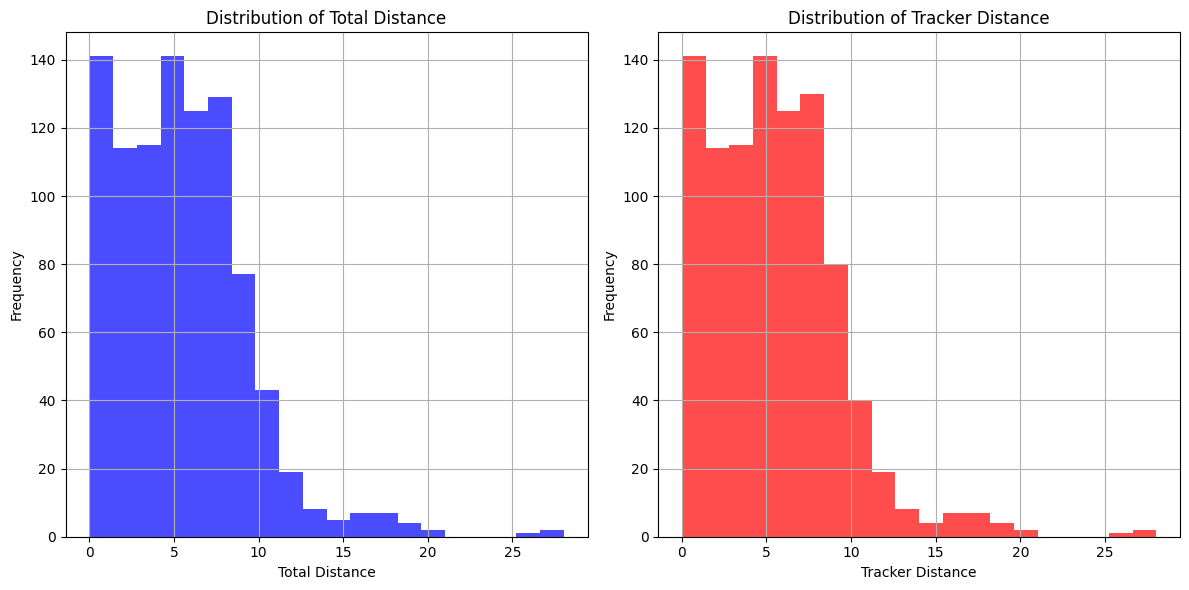

In [ ]:
#histogram
plt.figure(figsize=(12, 6))

# Plot histogram for TotalDistance
plt.subplot(1,2,1)
plt.hist(dailyActivity_merged['TotalDistance'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Total Distance')
plt.xlabel('Total Distance')
plt.ylabel('Frequency')
plt.grid()

# Plot histogram for TrackerDistance
plt.subplot(1,2,2)
plt.hist(dailyActivity_merged['TrackerDistance'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Tracker Distance')
plt.xlabel('Tracker Distance')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

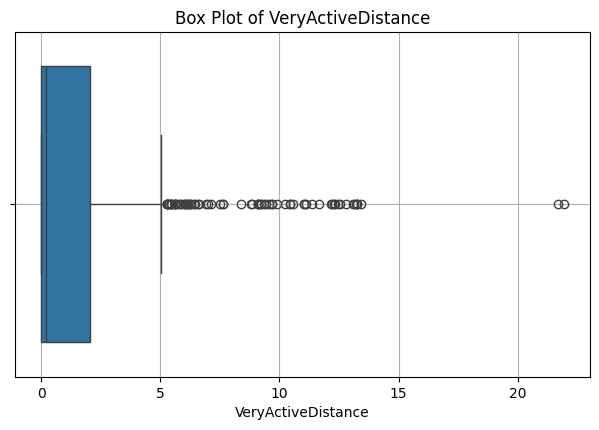

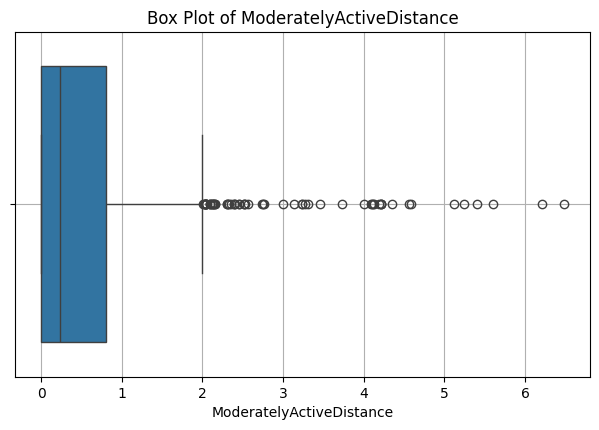

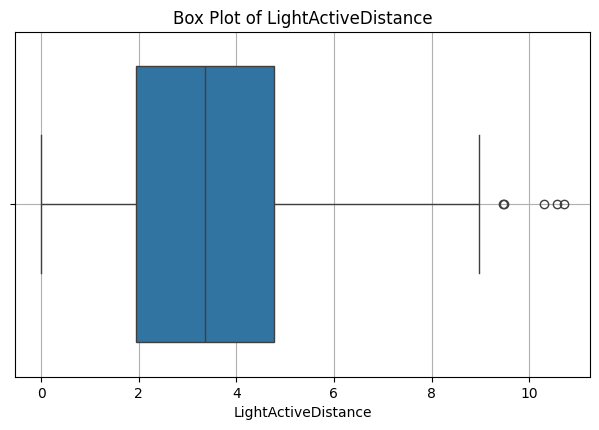

In [ ]:
# Plot box plots for VeryActiveDistance
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x=dailyActivity_merged['VeryActiveDistance'])
plt.title('Box Plot of VeryActiveDistance')
plt.xlabel('VeryActiveDistance')
plt.grid()

plt.tight_layout()
plt.show()

# Plot box plots for ModeratelyActiveDistance
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x=dailyActivity_merged['ModeratelyActiveDistance'])
plt.title('Box Plot of ModeratelyActiveDistance')
plt.xlabel('ModeratelyActiveDistance')
plt.grid()

plt.tight_layout()
plt.show()

# Plot box plots for LightActiveDistance
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x=dailyActivity_merged['LightActiveDistance'])
plt.title('Box Plot of LightActiveDistance')
plt.xlabel('LightActiveDistance')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
dailyActivity_merged_grouped = dailyActivity_merged.groupby(['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'])['TotalSteps'].sum().reset_index()
fig = px.scatter(dailyActivity_merged_grouped, x='TotalSteps', y=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'], title ='Total Steps in different Minutes')
fig.show()

In [ ]:
fig = px.scatter(dailyActivity_merged, x = 'TotalSteps', y = 'Calories', title = 'Total Steps Vs Calories', labels = {'TotalSteps' : 'Total Steps', 'Calories' : 'Calories'})
fig.show()

In [ ]:
dailyActivity_merged.to_csv('DailyActivity.csv', index = False)